## Line plot

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
s = pd.read_csv('daily-minimum-temperatures.csv')
s

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [7]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [6]:
df = pd.read_csv('daily-minimum-temperatures.csv',parse_dates=[0])
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [9]:
series = pd.read_csv('daily-minimum-temperatures.csv',index_col = 0,parse_dates=[0])
series

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [10]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


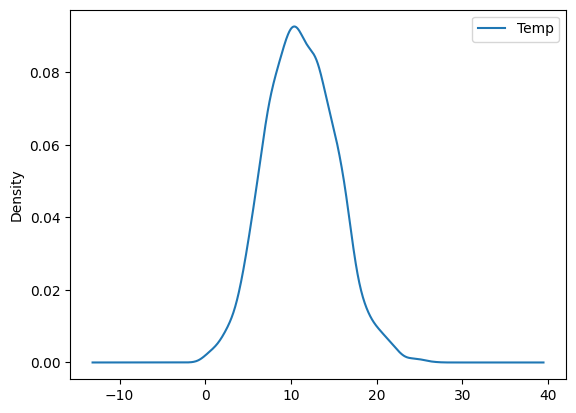

In [11]:
series.plot(kind = 'kde')
plt.show()

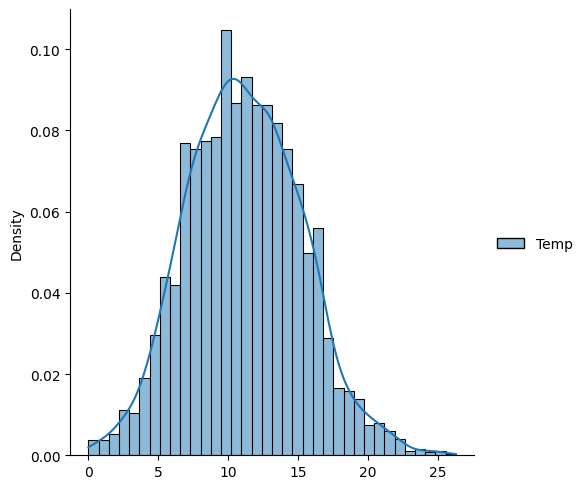

In [14]:
import seaborn as sns
sns.displot(series,kde = True,stat='density')

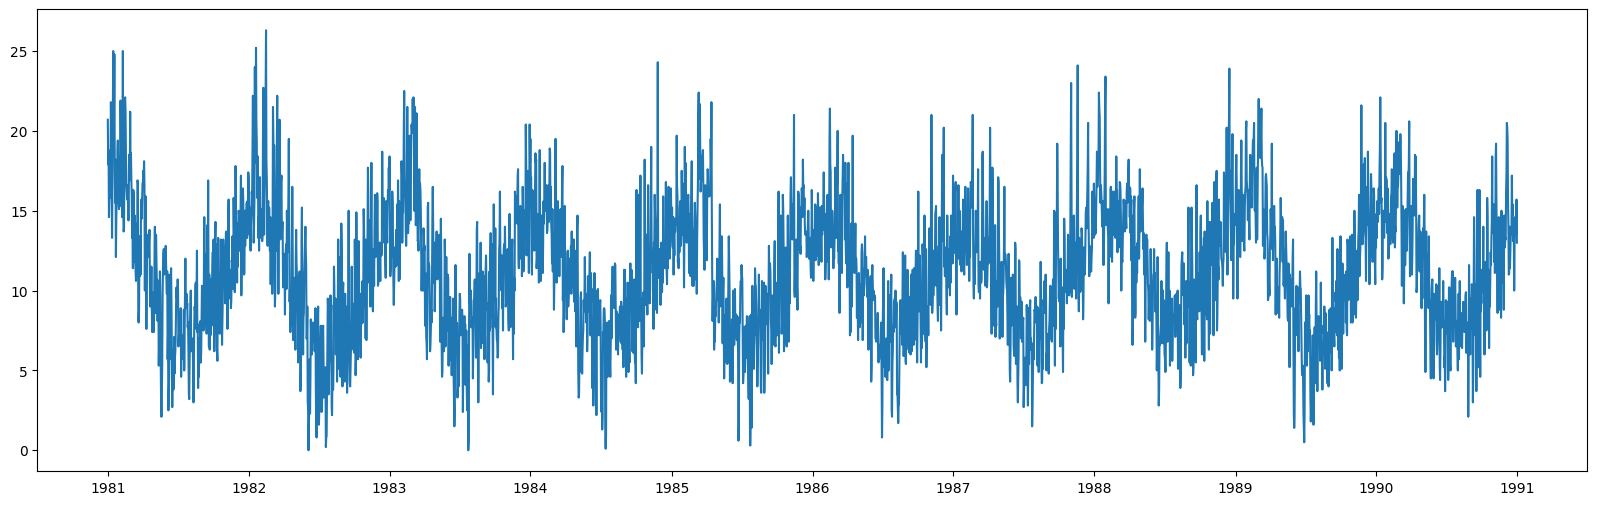

In [15]:
#line
plt.figure(figsize=(20,6))
plt.plot(series)

In [16]:
#box and whisker

{'whiskers': [<matplotlib.lines.Line2D at 0x7f869d98b6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f869d98bc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f869d98b430>],
 'medians': [<matplotlib.lines.Line2D at 0x7f869d7d0190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f869d7d0430>],
 'means': []}

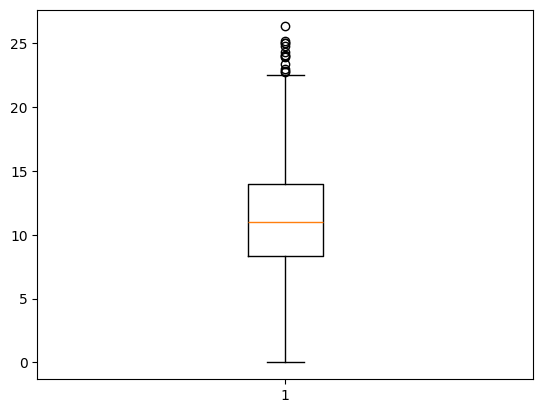

In [17]:
plt.boxplot(series)

<Axes: xlabel='Date', ylabel='Temp'>

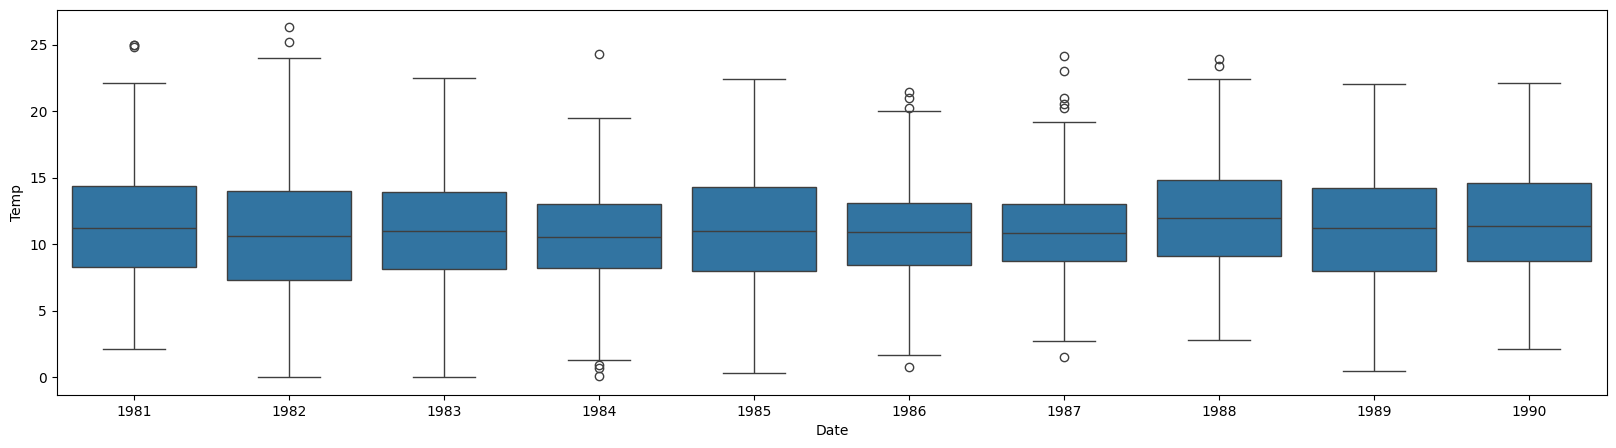

In [18]:
#annual data
fig,ax = plt.subplots(figsize = (20,5))
sns.boxplot(x = series.index.year,y = series.Temp,ax = ax)

<Axes: xlabel='Date', ylabel='Temp'>

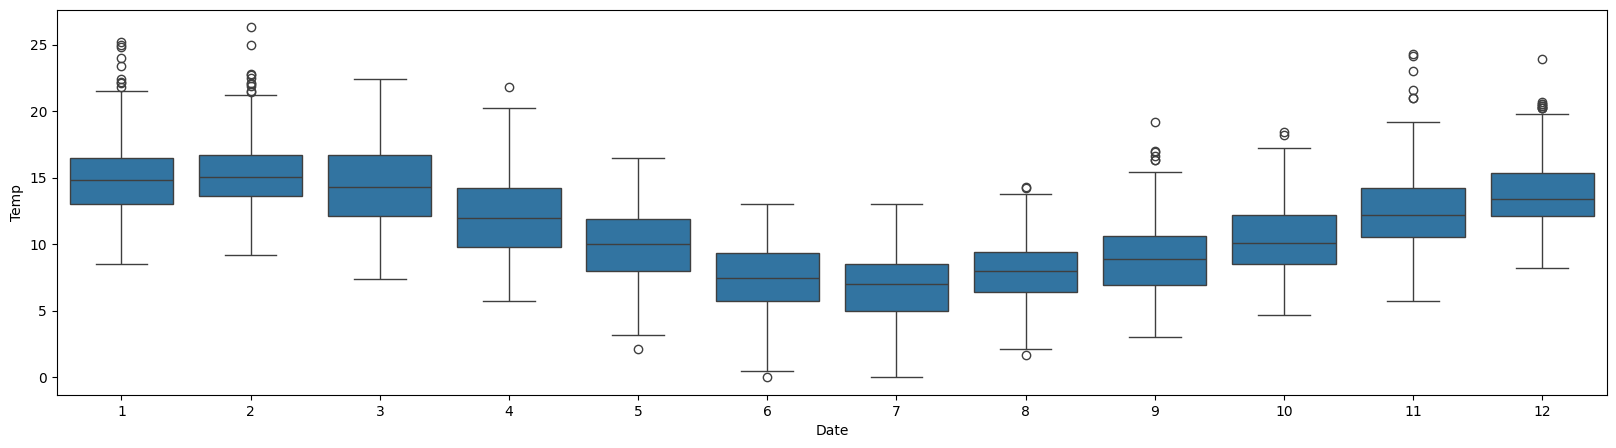

In [20]:
#1month
fig,ax = plt.subplots(figsize = (20,5))
sns.boxplot(x = series.index.month,y = series.Temp,ax = ax)

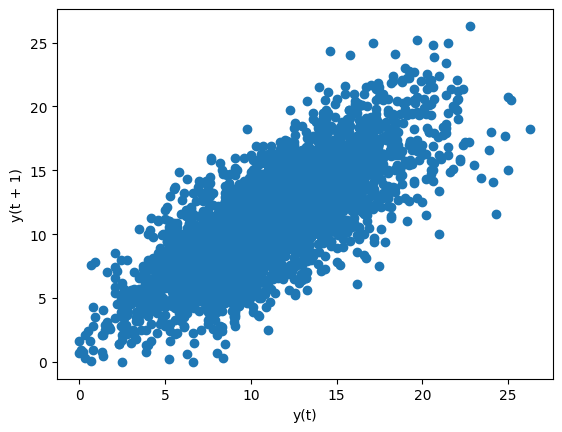

In [24]:
from pandas.plotting import lag_plot
lag_plot(series,lag = 1)
plt.show()

<Figure size 4000x1000 with 0 Axes>

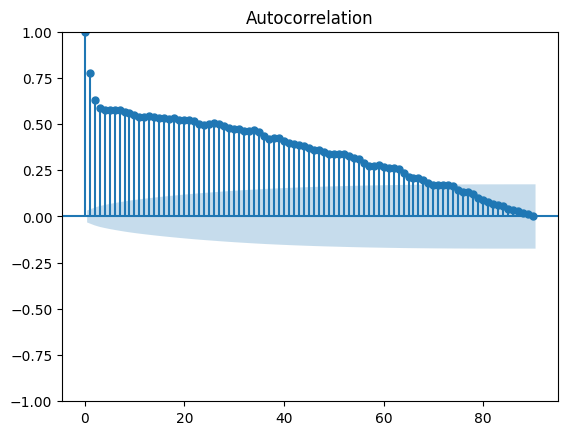

In [27]:
# auto corelation plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize = (40,10))
plot_acf(series,lags = 90)
plt.show()

<Figure size 4000x1000 with 0 Axes>

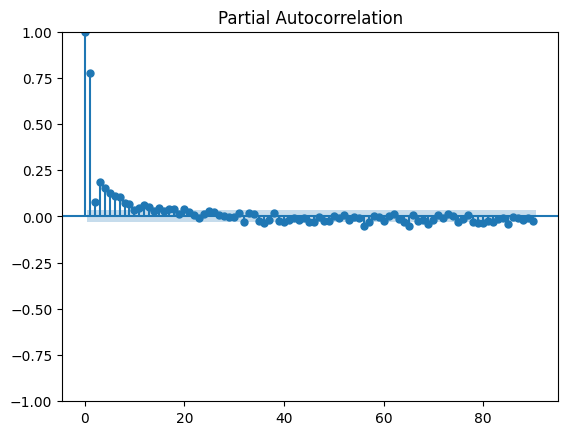

In [29]:
plt.figure(figsize = (40,10))
plot_pacf(series,lags = 90)
plt.show()

# SAMPLING AND TRANSFORMATION

In [31]:
import warnings
warnings.filterwarnings('ignore')

## UPSAMPLING

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df =pd.read_csv('sales.csv',parse_dates=[0])
df

,Month,Sales
0,1990-01-01,266.0
1,1990-02-01,145.9
2,1990-03-01,183.1
3,1990-04-01,119.3
4,1990-05-01,180.3
5,1990-06-01,168.5
6,1990-07-01,231.8
7,1990-08-01,224.5
8,1990-09-01,192.8
9,1990-10-01,122.9


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 704.0 bytes


In [43]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Month,36,1991-06-16 18:40:00,1990-01-01 00:00:00,1990-09-23 12:00:00,1991-06-16 00:00:00,1992-03-08 18:00:00,1992-12-01 00:00:00,NaN
Sales,36.0,312.6,119.3,192.45,280.15,411.1,682.0,148.937164


In [44]:
df[df.duplicated]

,Month,Sales


In [46]:
series = pd.read_csv('sales.csv',header = 0,index_col = 'Month',parse_dates=[0])
series

,Sales
Month,
1990-01-01,266.0
1990-02-01,145.9
1990-03-01,183.1
1990-04-01,119.3
1990-05-01,180.3
1990-06-01,168.5
1990-07-01,231.8
1990-08-01,224.5
1990-09-01,192.8


In [47]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1990-01-01 to 1992-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


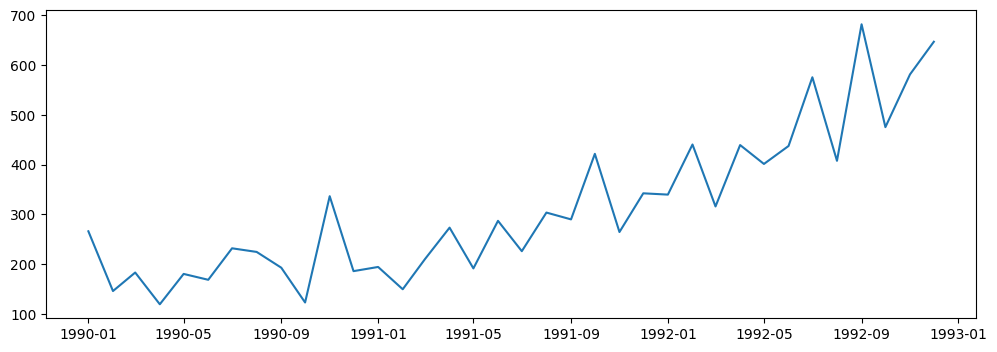

In [48]:
plt.figure(figsize= (12,4))
plt.plot(series)

In [51]:
#upsampling using resample
sub_series = series.head(2)
upsampled = sub_series.resample('D').mean()
upsampled

,Sales
Month,
1990-01-01,266.0
1990-01-02,NaN
1990-01-03,NaN
1990-01-04,NaN
1990-01-05,NaN
1990-01-06,NaN
1990-01-07,NaN
1990-01-08,NaN
1990-01-09,NaN


In [62]:
#linear interpolation
interpolated = upsampled.interpolate(method = 'linear')
interpolated

,Sales
Month,
1990-01-01,266.000000
1990-01-02,262.125806
1990-01-03,258.251613
1990-01-04,254.377419
1990-01-05,250.503226
1990-01-06,246.629032
1990-01-07,242.754839
1990-01-08,238.880645
1990-01-09,235.006452


In [63]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 1990-01-01 to 1990-02-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   32 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


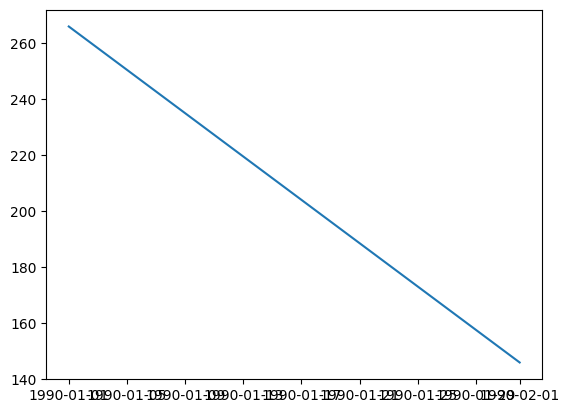

In [64]:
plt.plot(interpolated)

## downsampling

In [65]:
# downsampling
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()
quarterly_mean_sales

,Sales
Month,
1990-03-31,198.333333
1990-06-30,156.033333
1990-09-30,216.366667
1990-12-31,215.100000
1991-03-31,184.633333
1991-06-30,250.566667
1991-09-30,273.166667
1991-12-31,342.800000
1992-03-31,365.333333


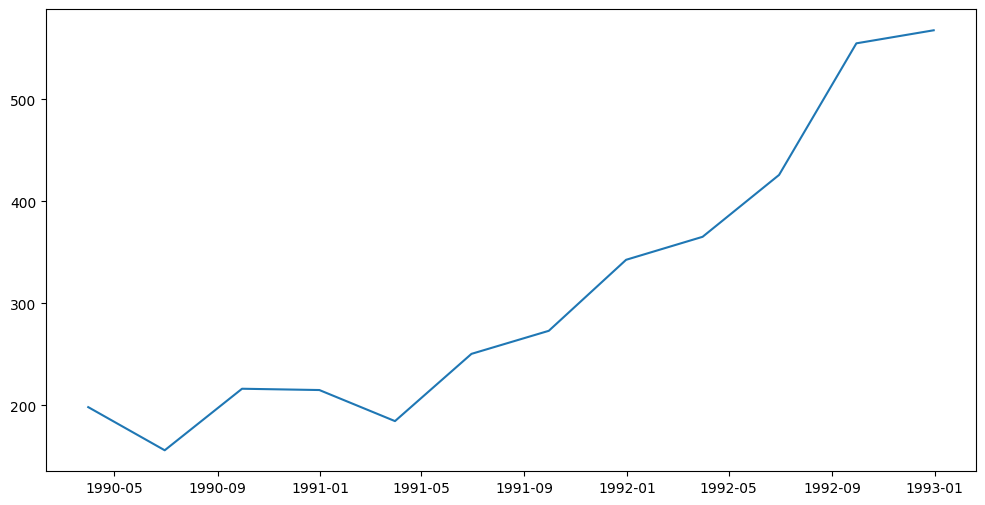

In [68]:
plt.figure(figsize=(12,6))
plt.plot(quarterly_mean_sales)

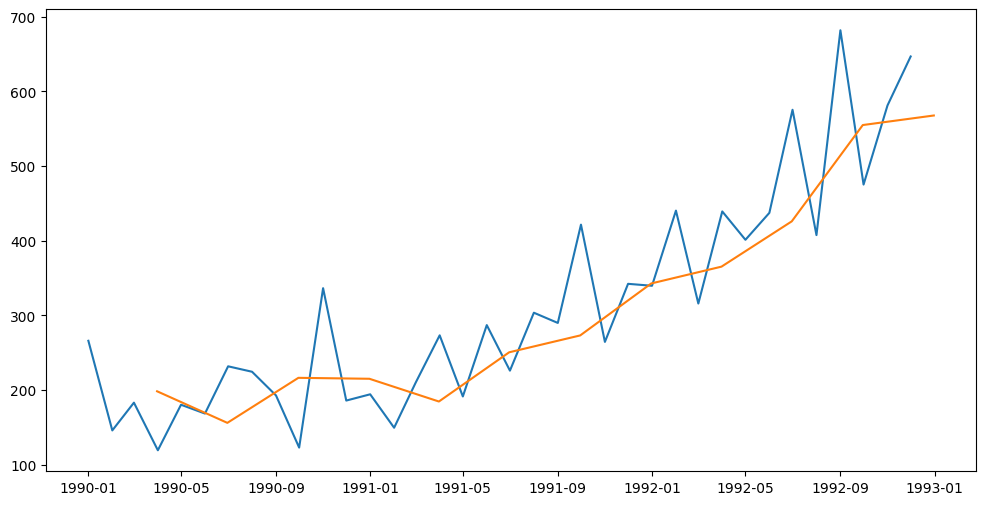

In [69]:
plt.figure(figsize=(12,6))
plt.plot(series)
plt.plot(quarterly_mean_sales)

# TRANSFORMATIONS

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('airline-passengers.csv',index_col = [0])
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [88]:
df = pd.read_csv('airline-passengers.csv',index_col = [0],parse_dates = [0])
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


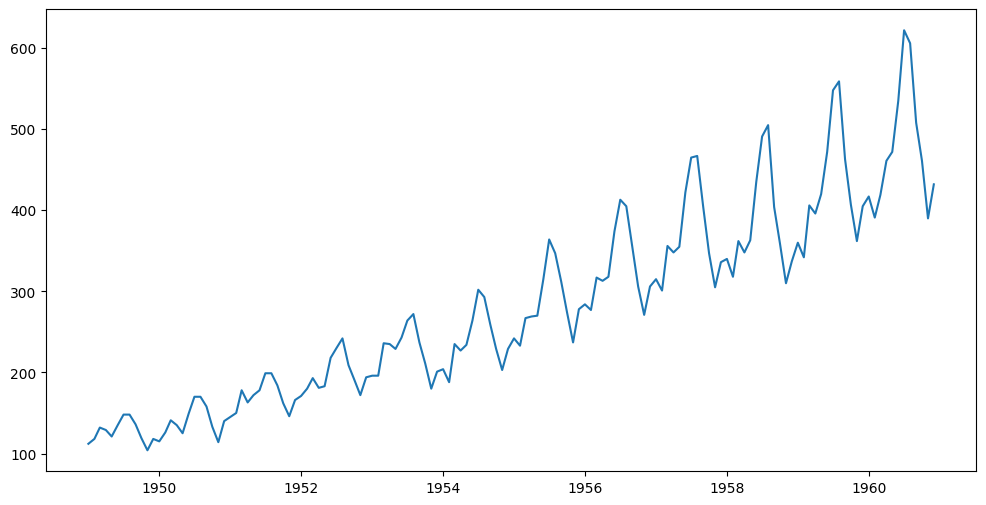

In [89]:
plt.figure(figsize= (12,6))
plt.plot(df['Passengers'])

## SQUARE ROOT

In [90]:
df['sqrt'] = np.sqrt(df['Passengers'])
df

,Passengers,sqrt
Month,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000
...,...,...
1960-08-01,606,24.617067
1960-09-01,508,22.538855
1960-10-01,461,21.470911


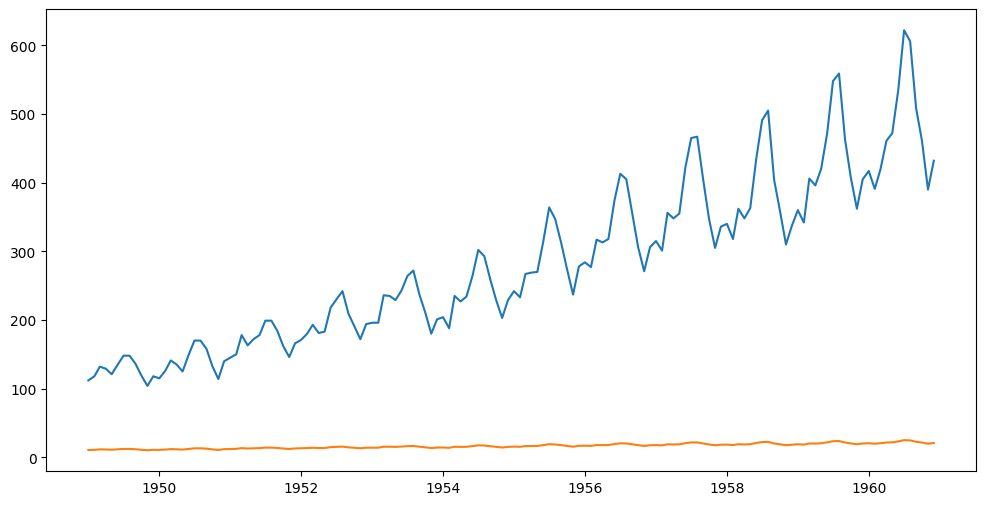

In [91]:
plt.figure(figsize =(12,6))
plt.plot(df['Passengers'])
plt.plot(df['sqrt'])

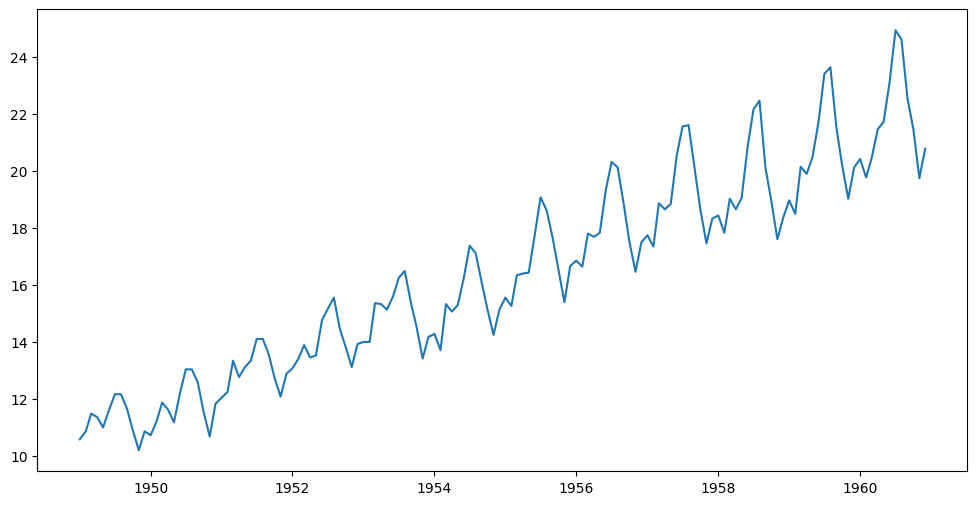

In [92]:
plt.figure(figsize =(12,6))
plt.plot(df['sqrt'])

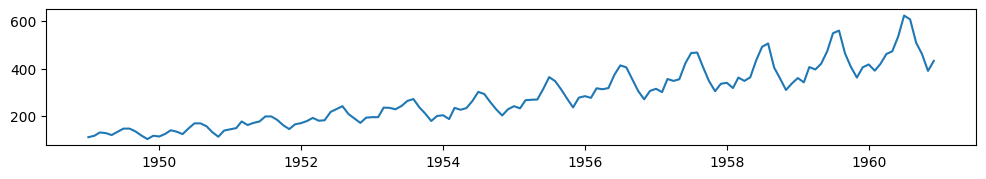

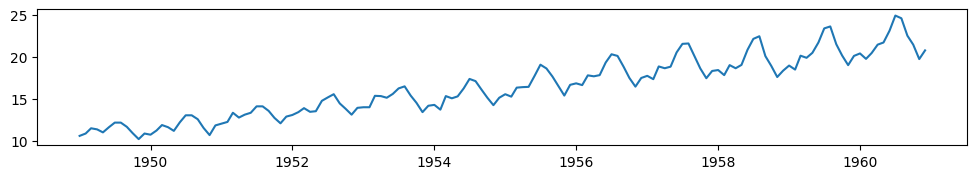

In [101]:
#line plot
plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(df['Passengers'])
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(df['sqrt'])
plt.show()

## LOG TRANSFORM

In [94]:
df['log'] = np.log(df['Passengers'])
df

,Passengers,sqrt,log
Month,,,
1949-01-01,112,10.583005,4.718499
1949-02-01,118,10.862780,4.770685
1949-03-01,132,11.489125,4.882802
1949-04-01,129,11.357817,4.859812
1949-05-01,121,11.000000,4.795791
...,...,...,...
1960-08-01,606,24.617067,6.406880
1960-09-01,508,22.538855,6.230481
1960-10-01,461,21.470911,6.133398


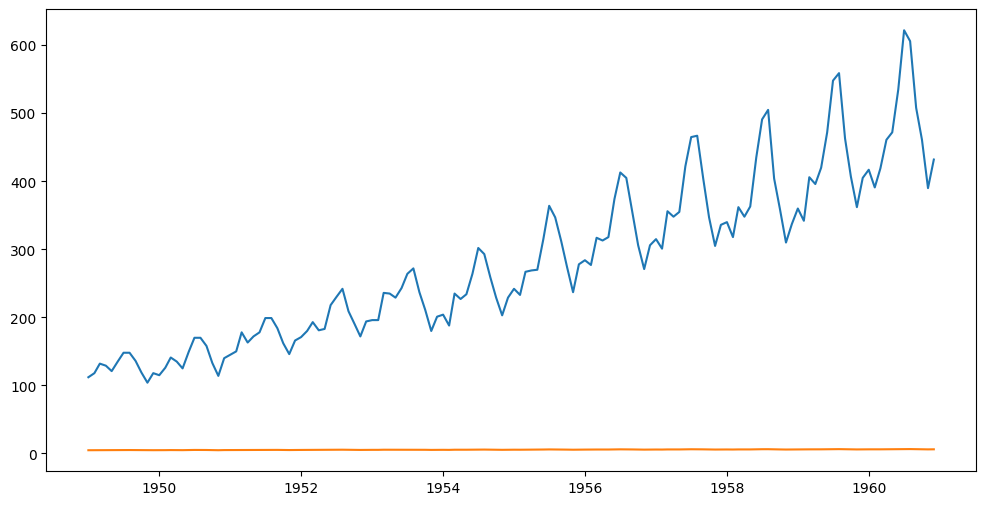

In [95]:
plt.figure(figsize =(12,6))
plt.plot(df['Passengers'])
plt.plot(df['log'])

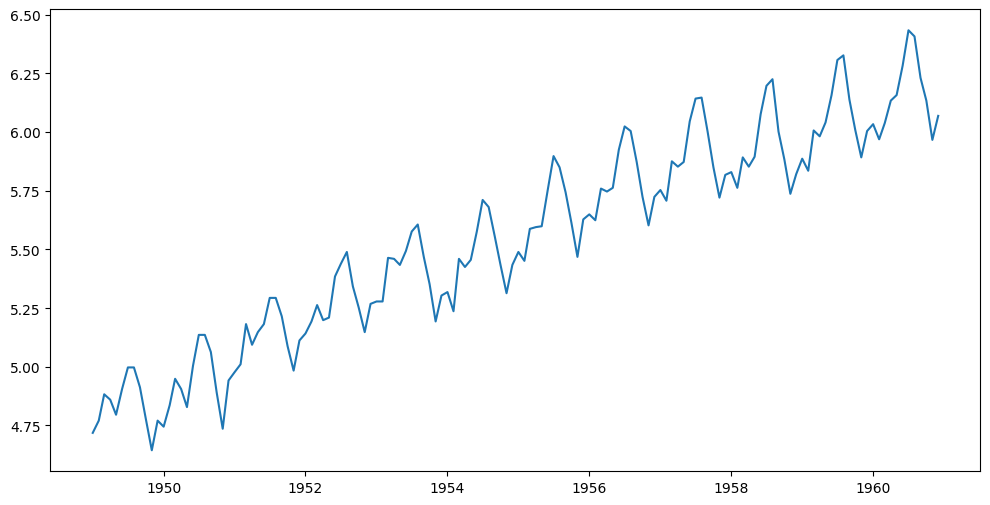

In [97]:
plt.figure(figsize =(12,6))
plt.plot(df['log'])

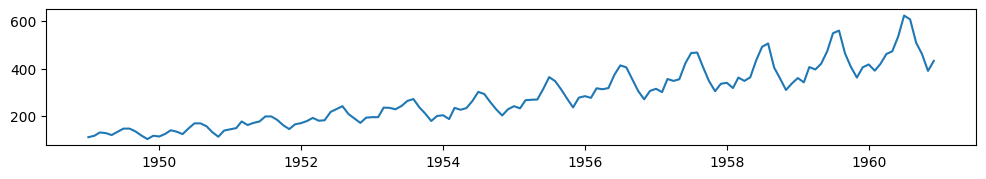

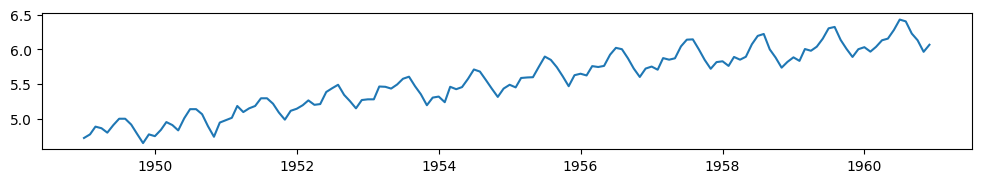

In [98]:
#line plot
plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(df['Passengers'])
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(df['log'])
plt.show()

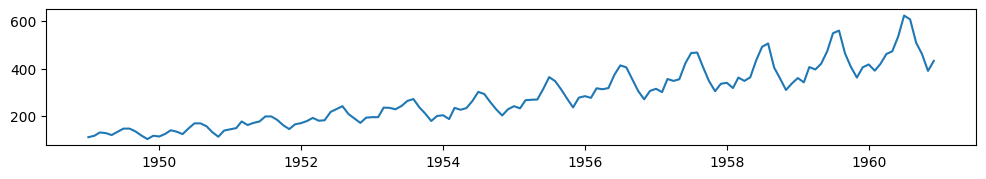

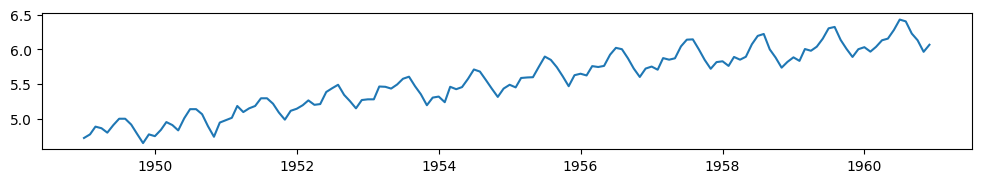

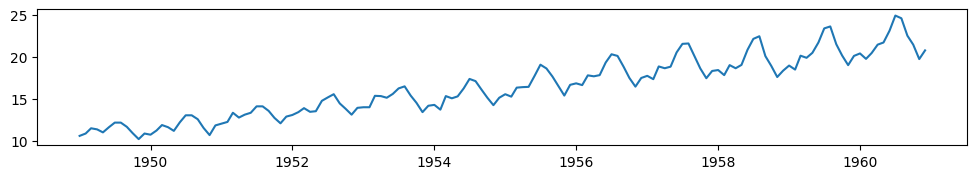

In [99]:
#line plot
plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(df['Passengers'])
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(df['log'])
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(df['sqrt'])
plt.show()

# FORECASTING REGRESSION MODELS

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('footfalls.csv')
df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [70]:
df = pd.read_csv('footfalls.csv',parse_dates = [0])
df

/tmp/ipykernel_23502/899329570.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('footfalls.csv',parse_dates = [0])


,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          159 non-null    object 
 1   Footfalls      159 non-null    int64  
 2   t              159 non-null    int64  
 3   log_footfalls  159 non-null    float64
 4   t_square       159 non-null    int64  
 5   Jan            159 non-null    int64  
 6   Feb            159 non-null    int64  
 7   Mar            159 non-null    int64  
 8   Apr            159 non-null    int64  
 9   May            159 non-null    int64  
 10  Jun            159 non-null    int64  
 11  Jul            159 non-null    int64  
 12  Aug            159 non-null    int64  
 13  Sep            159 non-null    int64  
 14  Oct            159 non-null    int64  
 15  Nov            159 non-null    int64  
 16  Dec            159 non-null    int64  
dtypes: float64(1), int64(15), object(1)
memory usage: 21.2

In [72]:
df[df.duplicated]

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec


In [73]:
df.isnull().sum()

Month            0
Footfalls        0
t                0
log_footfalls    0
t_square         0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Dec              0
dtype: int64

In [74]:
df['date'] = pd.to_datetime(df.Month,format="%b-%y")
df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,date
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          159 non-null    object        
 1   Footfalls      159 non-null    int64         
 2   t              159 non-null    int64         
 3   log_footfalls  159 non-null    float64       
 4   t_square       159 non-null    int64         
 5   Jan            159 non-null    int64         
 6   Feb            159 non-null    int64         
 7   Mar            159 non-null    int64         
 8   Apr            159 non-null    int64         
 9   May            159 non-null    int64         
 10  Jun            159 non-null    int64         
 11  Jul            159 non-null    int64         
 12  Aug            159 non-null    int64         
 13  Sep            159 non-null    int64         
 14  Oct            159 non-null    int64         
 15  Nov            159 non-

In [76]:
# extract month and year
df['month'] = df['date'].dt.strftime("%b")   # e.g., Jan, Feb, Mar
df['year'] = df['date'].dt.strftime("%y")    # e.g., 25

df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,91
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,91
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,03
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,03
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,04
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,Feb,04


<Axes: xlabel='month', ylabel='year'>

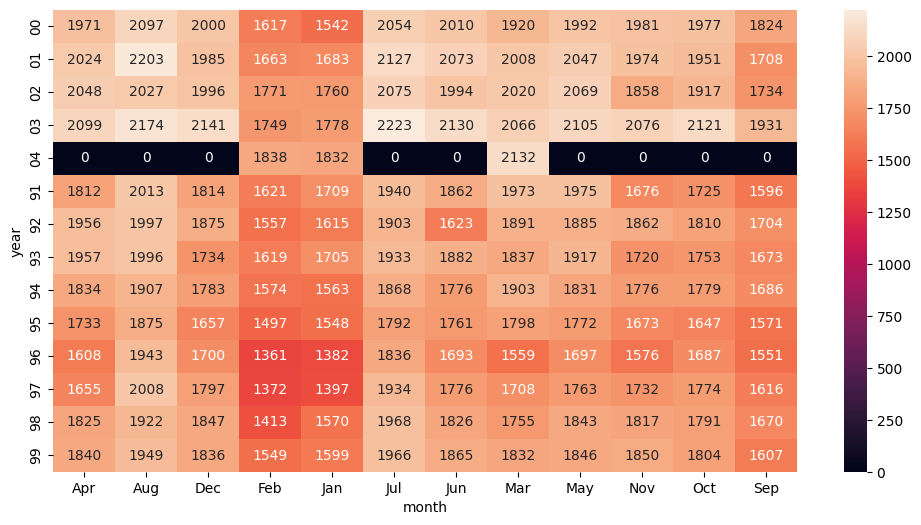

In [77]:
#heat map
plt.figure(figsize=(12,6))
heat_map = pd.pivot_table(data = df,values = 'Footfalls',index ='year',columns = 'month',aggfunc = 'mean',fill_value = 0)
sns.heatmap(heat_map,annot=True,fmt='g')

In [78]:
heat_map

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
00,1971.0,2097.0,2000.0,1617.0,1542.0,2054.0,2010.0,1920.0,1992.0,1981.0,1977.0,1824.0
01,2024.0,2203.0,1985.0,1663.0,1683.0,2127.0,2073.0,2008.0,2047.0,1974.0,1951.0,1708.0
02,2048.0,2027.0,1996.0,1771.0,1760.0,2075.0,1994.0,2020.0,2069.0,1858.0,1917.0,1734.0
03,2099.0,2174.0,2141.0,1749.0,1778.0,2223.0,2130.0,2066.0,2105.0,2076.0,2121.0,1931.0
04,0.0,0.0,0.0,1838.0,1832.0,0.0,0.0,2132.0,0.0,0.0,0.0,0.0
91,1812.0,2013.0,1814.0,1621.0,1709.0,1940.0,1862.0,1973.0,1975.0,1676.0,1725.0,1596.0
92,1956.0,1997.0,1875.0,1557.0,1615.0,1903.0,1623.0,1891.0,1885.0,1862.0,1810.0,1704.0
93,1957.0,1996.0,1734.0,1619.0,1705.0,1933.0,1882.0,1837.0,1917.0,1720.0,1753.0,1673.0
94,1834.0,1907.0,1783.0,1574.0,1563.0,1868.0,1776.0,1903.0,1831.0,1776.0,1779.0,1686.0


<Axes: xlabel='year', ylabel='Footfalls'>

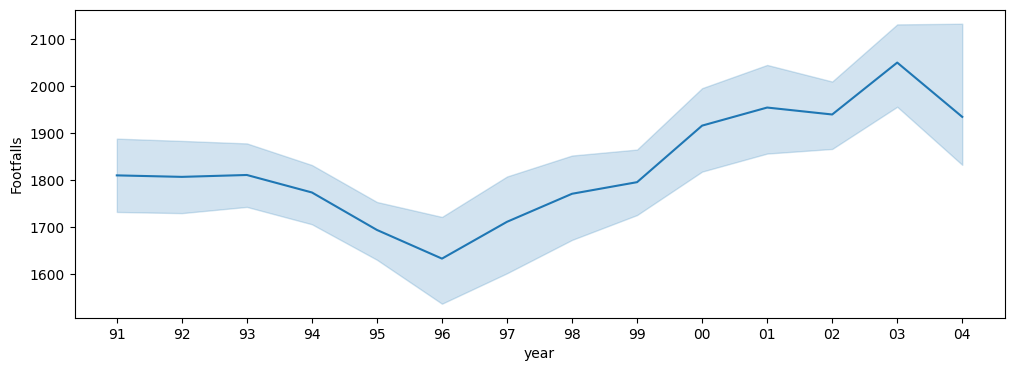

In [79]:
plt.figure(figsize = (12,4))
sns.lineplot(x='year',y='Footfalls',data = df)

/tmp/ipykernel_23502/3576834936.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year',y='Footfalls',data = df,ci=None)


<Axes: xlabel='year', ylabel='Footfalls'>

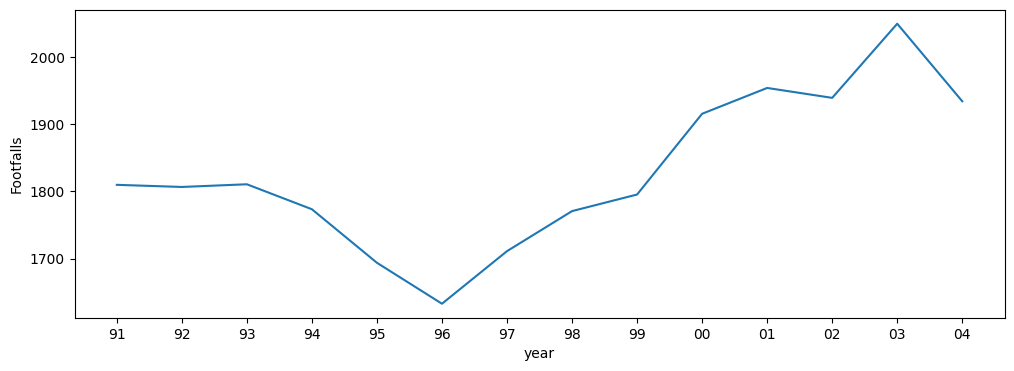

In [80]:
plt.figure(figsize = (12,4))
sns.lineplot(x='year',y='Footfalls',data = df,ci=None)

### SPLIT TRAIN TEST

In [81]:
Train = df.head(147) 
Test = df.tail(12)

In [82]:
Test

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,date,month,year
147,Apr-03,2099,148,7.649216,21904,0,0,0,1,0,0,0,0,0,0,0,0,2003-04-01,Apr,03
148,May-03,2105,149,7.652071,22201,0,0,0,0,1,0,0,0,0,0,0,0,2003-05-01,May,03
149,Jun-03,2130,150,7.663877,22500,0,0,0,0,0,1,0,0,0,0,0,0,2003-06-01,Jun,03
150,Jul-03,2223,151,7.706613,22801,0,0,0,0,0,0,1,0,0,0,0,0,2003-07-01,Jul,03
151,Aug-03,2174,152,7.684324,23104,0,0,0,0,0,0,0,1,0,0,0,0,2003-08-01,Aug,03
152,Sep-03,1931,153,7.565793,23409,0,0,0,0,0,0,0,0,1,0,0,0,2003-09-01,Sep,03
153,Oct-03,2121,154,7.659643,23716,0,0,0,0,0,0,0,0,0,1,0,0,2003-10-01,Oct,03
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,03
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,03
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,04


## LINEAR MODEL

In [83]:
import statsmodels.formula.api as sms
linear_model = sms.ols('Footfalls~t',data = Train).fit() 
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

In [84]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Footfalls   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     14.40
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           0.000217
Time:                        14:42:57   Log-Likelihood:                -956.67
No. Observations:                 147   AIC:                             1917.
Df Residuals:                     145   BIC:                             1923.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1713.1154     27.083     63.254      0.000    1659.586    1766.644
t              1.2046      0.317      3.794      0.000       0.577       1.832
==============================================================================
Omnibus:                        5.273   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.400
Skew:                          -0.456   Prob(JB):                       0.0672
Kurtosis:                       2.775   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
rsme_linear = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_linear))**2))
rsme_linear

209.92559265462572

## Exponential

In [86]:
exp = sms.ols('log_footfalls~t',data = Train).fit() 
pred_exp = pd.Series(exp.predict(pd.DataFrame(Test['t'])))
exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_footfalls   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     12.88
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           0.000454
Time:                        14:42:58   Log-Likelihood:                 141.07
No. Observations:                 147   AIC:                            -278.1
Df Residuals:                     145   BIC:                            -272.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4440      0.015    481.116      0.000       7.413       7.475
t              0.0007      0.000      3.588      0.000       0.000       0.001
==============================================================================
Omnibus:                       11.184   Durbin-Watson:                   1.076
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.698
Skew:                          -0.682   Prob(JB):                      0.00288
Kurtosis:                       3.216   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
rsme_exp = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_exp)))**2))
rsme_exp

217.05263569546594

## QUAD

In [88]:
#seasonality + quadratic
add_sea_quad = sms.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
add_sea_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Footfalls   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     48.36
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           6.74e-44
Time:                        14:42:58   Log-Likelihood:                -835.36
No. Observations:                 147   AIC:                             1699.
Df Residuals:                     133   BIC:                             1741.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1903.2821     28.297     67.262      0.000    1847.312    1959.252
t             -5.2459      0.587     -8.943      0.000      -6.406      -4.086
t_square       0.0437      0.004     11.394      0.000       0.036       0.051
Jan         -237.7346     29.943     -7.939      0.000    -296.962    -178.508
Feb         -276.4581     29.940     -9.234      0.000    -335.678    -217.238
Mar           22.8079     29.938      0.762      0.448     -36.408      82.024
Apr           29.7468     30.529      0.974      0.332     -30.639      90.132
May           59.9910     30.524      1.965      0.051      -0.384     120.366
Jun           17.6476     30.520      0.578      0.564     -42.719      78.014
Jul          121.1334     30.516      3.970      0.000      60.774     181.492
Aug          165.0317     30.513      5.409      0.000     104.679     225.384
Sep         -169.3241     30.510     -5.550      0.000    -229.672    -108.976
Oct          -31.1008     30.508     -1.019      0.310     -91.445      29.244
Nov          -42.5483     30.507     -1.395      0.165    -102.891      17.794
==============================================================================
Omnibus:                        8.197   Durbin-Watson:                   0.699
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.158
Skew:                          -0.570   Prob(JB):                       0.0169
Kurtosis:                       3.173   Cond. No.                     1.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
rsme_add_sea_quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea_quad))**2))
rsme_add_sea_quad

50.607245841424444

In [90]:
pred_add_sea_quad

147    2114.886712
148    2152.878077
149    2118.369441
150    2229.777472
151    2281.685503
152    1955.426867
153    2101.834898
154    2098.659595
155    2149.567626
156    1920.280215
157    1890.091428
158    2197.979564
dtype: float64

## PLOT THE PREDICTIONS

In [91]:
predict_data = pd.read_csv('footfalls.csv')
predict_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [92]:
model_full = sms.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = df).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Footfalls   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     64.84
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           1.22e-53
Time:                        14:42:58   Log-Likelihood:                -899.65
No. Observations:                 159   AIC:                             1827.
Df Residuals:                     145   BIC:                             1870.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1899.4683     26.390     71.978      0.000    1847.310    1951.626
t             -4.9395      0.506     -9.756      0.000      -5.940      -3.939
t_square       0.0413      0.003     13.459      0.000       0.035       0.047
Jan         -243.0715     27.996     -8.682      0.000    -298.405    -187.738
Feb         -279.1206     27.994     -9.971      0.000    -334.449    -223.792
Mar           19.2477     27.992      0.688      0.493     -36.077      74.573
Apr           28.4484     28.504      0.998      0.320     -27.889      84.786
May           56.3062     28.500      1.976      0.050      -0.023     112.636
Jun           18.6199     28.497      0.653      0.515     -37.703      74.942
Jul          120.7741     28.494      4.239      0.000      64.458     177.091
Aug          156.9997     28.491      5.510      0.000     100.688     213.311
Sep         -170.8572     28.489     -5.997      0.000    -227.165    -114.550
Oct          -29.1813     28.488     -1.024      0.307     -85.486      27.124
Nov          -43.7417     28.487     -1.536      0.127    -100.045      12.562
==============================================================================
Omnibus:                        8.075   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.895
Skew:                          -0.530   Prob(JB):                       0.0193
Kurtosis:                       3.265   Cond. No.                     1.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
pred_new = pd.Series(model_full.predict(predict_data))
pred_new

0      1651.498567
1      1610.633751
2      1904.268934
3      1908.818948
4      1932.108568
          ...     
154    2081.333519
155    2132.966976
156    1897.869774
157    1869.877448
158    2176.385122
Length: 159, dtype: float64

In [94]:
predict_data['forecasted_footfalls'] = pd.Series(pred_new)
predict_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,forecasted_footfalls
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1651.498567
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1610.633751
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1904.268934
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1908.818948
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1932.108568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2081.333519
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2132.966976
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,1897.869774
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,1869.877448


In [95]:
new_df = pd.concat([df,predict_data])
new_df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,date,month,year,forecasted_footfalls
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,...,0,0,0,0,0,0,1991-01-01,Jan,91,NaN
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,...,0,0,0,0,0,0,1991-02-01,Feb,91,NaN
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,...,0,0,0,0,0,0,1991-03-01,Mar,91,NaN
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,...,0,0,0,0,0,0,1991-04-01,Apr,91,NaN
4,May-91,1975,5,7.588324,25,0,0,0,0,1,...,0,0,0,0,0,0,1991-05-01,May,91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,...,0,0,0,0,1,0,NaT,NaN,NaN,2081.333519
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,...,0,0,0,0,0,1,NaT,NaN,NaN,2132.966976
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,1897.869774
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,1869.877448


<Axes: >

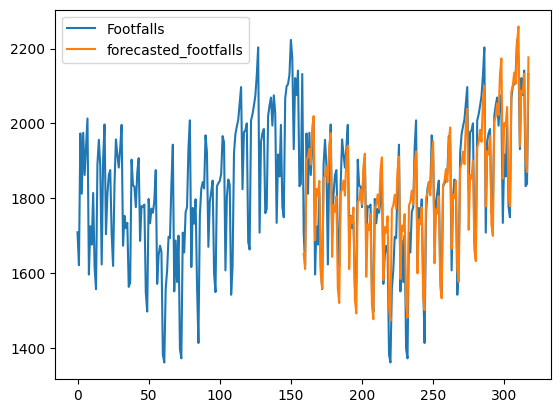

In [96]:
new_df[['Footfalls','forecasted_footfalls']].reset_index(drop=True).plot()

In [97]:
df['forecasted_footfalls'] = pd.Series(pred_new)
df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,date,month,year,forecasted_footfalls
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,...,0,0,0,0,0,0,1991-01-01,Jan,91,1651.498567
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,...,0,0,0,0,0,0,1991-02-01,Feb,91,1610.633751
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,...,0,0,0,0,0,0,1991-03-01,Mar,91,1904.268934
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,...,0,0,0,0,0,0,1991-04-01,Apr,91,1908.818948
4,May-91,1975,5,7.588324,25,0,0,0,0,1,...,0,0,0,0,0,0,1991-05-01,May,91,1932.108568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,...,0,0,0,0,1,0,2003-11-01,Nov,03,2081.333519
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,...,0,0,0,0,0,1,2003-12-01,Dec,03,2132.966976
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,...,0,0,0,0,0,0,2004-01-01,Jan,04,1897.869774
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,...,0,0,0,0,0,0,2004-02-01,Feb,04,1869.877448


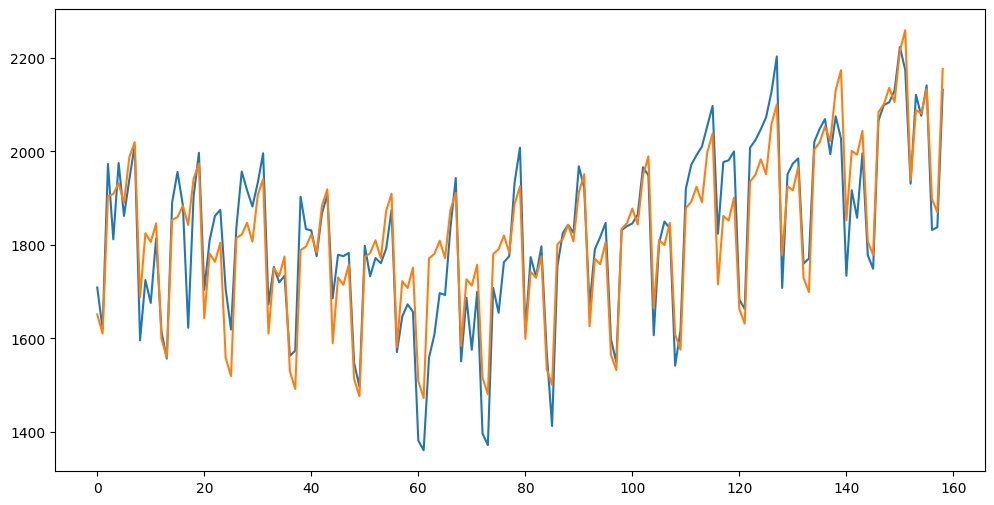

In [107]:
plt.figure(figsize=(12,6))
plt.plot(df[['Footfalls','forecasted_footfalls']])

In [100]:
predict_data['forecasted_footfalls'] = pd.Series(pred_new)
predict_data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,forecasted_footfalls
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1651.498567
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1610.633751
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1904.268934
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1908.818948
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1932.108568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2081.333519
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2132.966976
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,1897.869774
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,1869.877448


<Axes: >

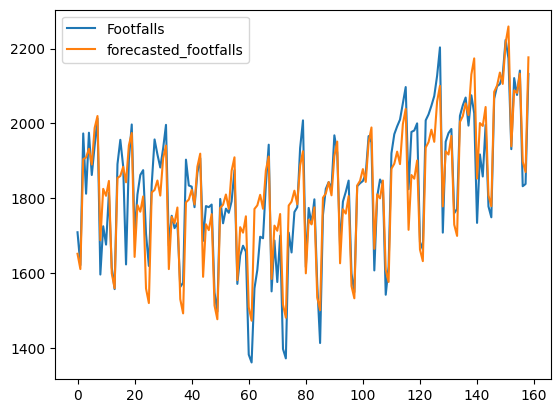

In [106]:
predict_data[['Footfalls','forecasted_footfalls']].plot()

In [165]:
future_data = add_sea_quad.forecast(10)
future_data = pd.DataFrame(future_data,columns = [['forecast']])
future_data

AttributeError: 'OLSResults' object has no attribute 'forecast'

TypeError: 'RegressionResultsWrapper' object is not subscriptable

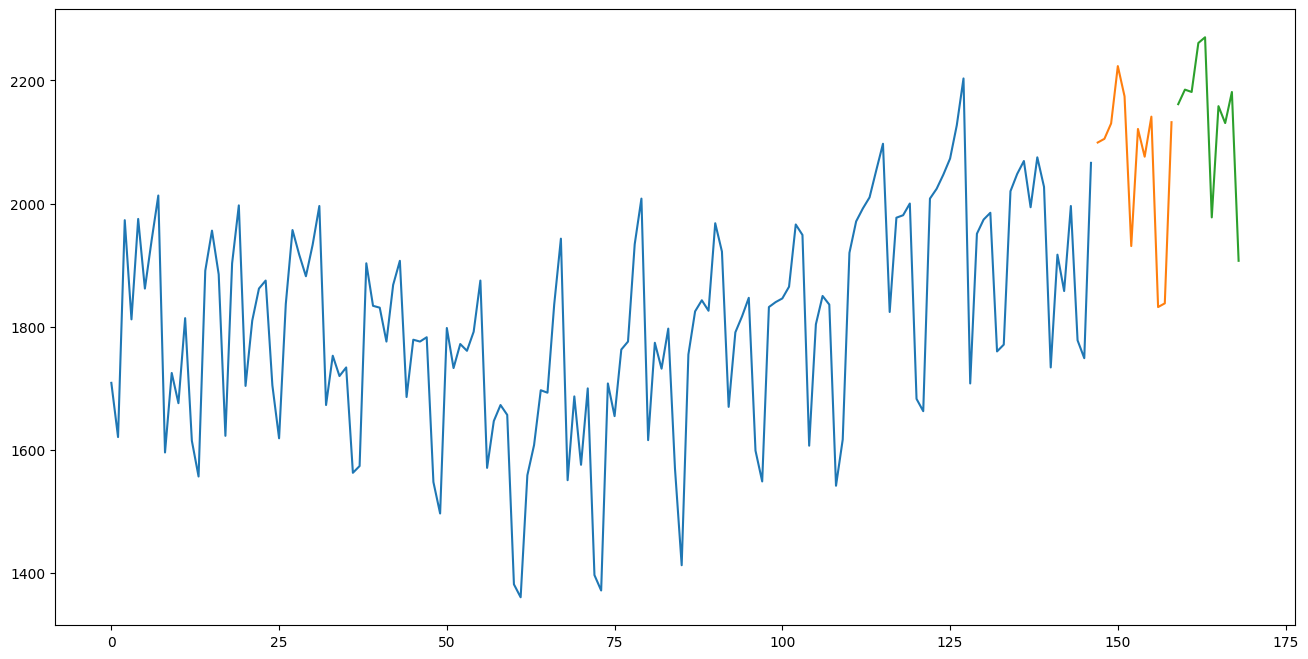

In [164]:
add_sea_quad
plt.figure(figsize=(16,8))
plt.plot(Train['Footfalls'],label = 'Train')
plt.plot(Test['Footfalls'],label = 'Test')
plt.plot(future_data)
plt.plot(add_sea_quad['forecasted_footfalls'],label = "Forecast")
plt.legend(loc='best')
plt.show()

# SIMPLE EXPONENTIAL SMOOTHENING

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing

In [114]:
df = pd.read_csv('footfalls.csv')
df

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          159 non-null    object 
 1   Footfalls      159 non-null    int64  
 2   t              159 non-null    int64  
 3   log_footfalls  159 non-null    float64
 4   t_square       159 non-null    int64  
 5   Jan            159 non-null    int64  
 6   Feb            159 non-null    int64  
 7   Mar            159 non-null    int64  
 8   Apr            159 non-null    int64  
 9   May            159 non-null    int64  
 10  Jun            159 non-null    int64  
 11  Jul            159 non-null    int64  
 12  Aug            159 non-null    int64  
 13  Sep            159 non-null    int64  
 14  Oct            159 non-null    int64  
 15  Nov            159 non-null    int64  
 16  Dec            159 non-null    int64  
dtypes: float64(1), int64(15), object(1)
memory usage: 21.2

In [120]:
df['Month'] = pd.to_datetime(df['Month'],errors = 'ignore',format = '%b-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          159 non-null    datetime64[ns]
 1   Footfalls      159 non-null    int64         
 2   t              159 non-null    int64         
 3   log_footfalls  159 non-null    float64       
 4   t_square       159 non-null    int64         
 5   Jan            159 non-null    int64         
 6   Feb            159 non-null    int64         
 7   Mar            159 non-null    int64         
 8   Apr            159 non-null    int64         
 9   May            159 non-null    int64         
 10  Jun            159 non-null    int64         
 11  Jul            159 non-null    int64         
 12  Aug            159 non-null    int64         
 13  Sep            159 non-null    int64         
 14  Oct            159 non-null    int64         
 15  Nov            159 non-

/tmp/ipykernel_23502/2044936416.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Month'] = pd.to_datetime(df['Month'],errors = 'ignore',format = '%b-%y')


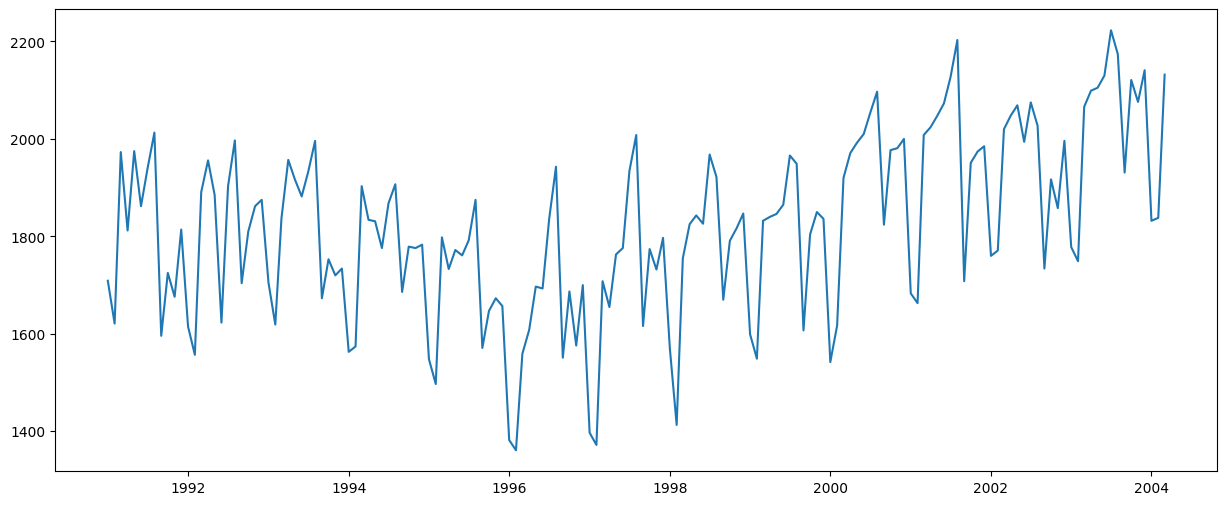

In [121]:
plt.figure(figsize=(15,6))
plt.plot(df['Month'],df['Footfalls'])

In [122]:
#split train test
Train = df.head(147)
Test = df.tail(12)
Test

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
147,2003-04-01,2099,148,7.649216,21904,0,0,0,1,0,0,0,0,0,0,0,0
148,2003-05-01,2105,149,7.652071,22201,0,0,0,0,1,0,0,0,0,0,0,0
149,2003-06-01,2130,150,7.663877,22500,0,0,0,0,0,1,0,0,0,0,0,0
150,2003-07-01,2223,151,7.706613,22801,0,0,0,0,0,0,1,0,0,0,0,0
151,2003-08-01,2174,152,7.684324,23104,0,0,0,0,0,0,0,1,0,0,0,0
152,2003-09-01,1931,153,7.565793,23409,0,0,0,0,0,0,0,0,1,0,0,0
153,2003-10-01,2121,154,7.659643,23716,0,0,0,0,0,0,0,0,0,1,0,0
154,2003-11-01,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,2003-12-01,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,2004-01-01,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0


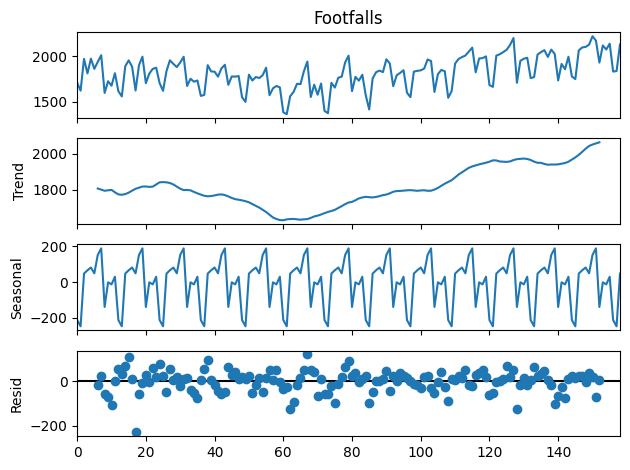

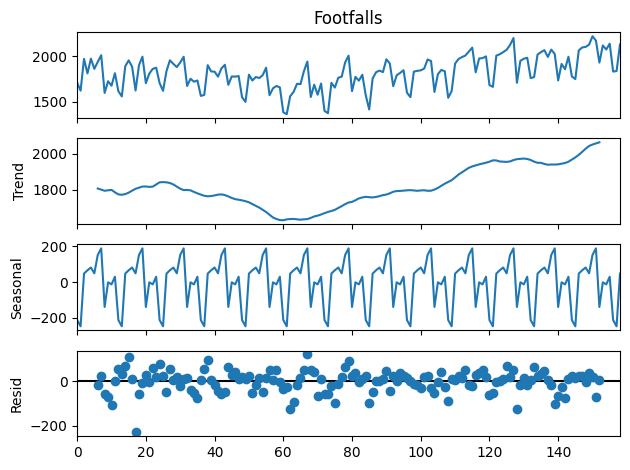

In [123]:
# decompose
decompose_ts_add = seasonal_decompose(df.Footfalls,period = 12)
decompose_ts_add.plot()

In [ ]:
#mean absolute percentage error - evaluation metric

In [126]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

In [127]:
#Simple
ses_model = SimpleExpSmoothing(Train['Footfalls']).fit(smoothing_level = 0.7)
pred_ses = pd.DataFrame()
pred_ses['Exp Smoothing'] = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses['Exp Smoothing'],Test['Footfalls'])

/home/rgukt/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


6.933162504825568

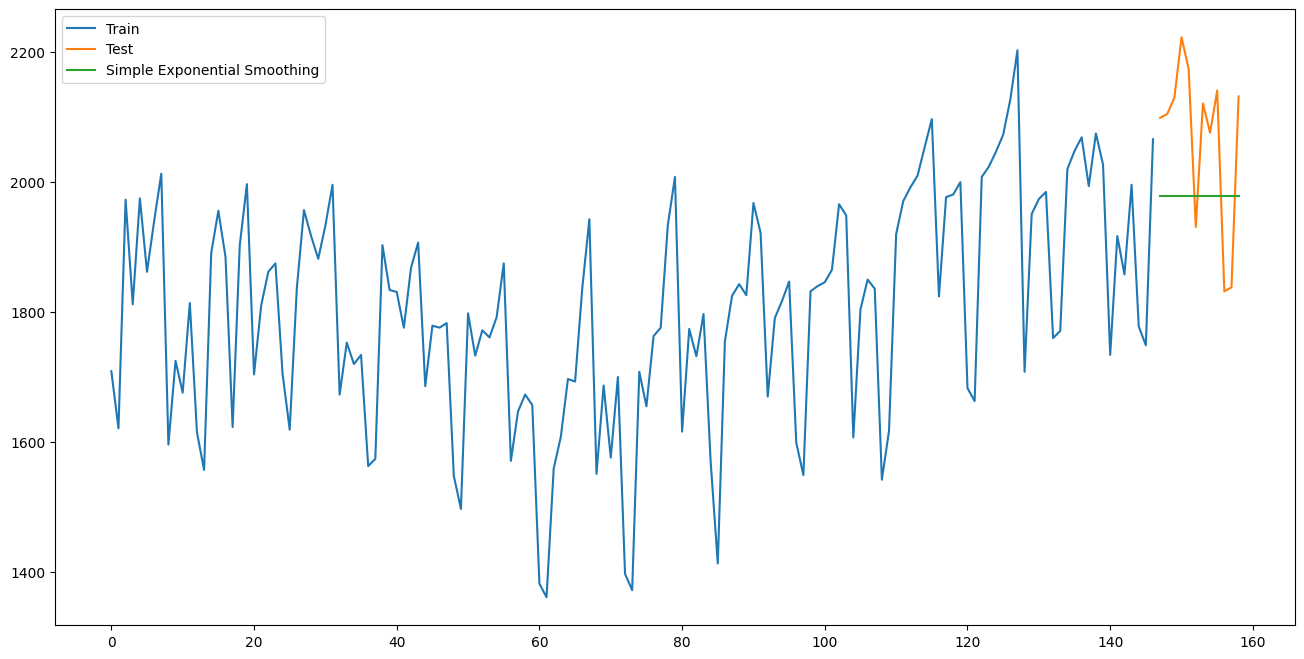

In [128]:
plt.figure(figsize=(16,8))
plt.plot(Train['Footfalls'],label = 'Train')
plt.plot(Test['Footfalls'],label = 'Test')
plt.plot(pred_ses['Exp Smoothing'],label = "Simple Exponential Smoothing")
plt.legend(loc='best')
plt.show()

In [133]:
# double exponential

In [130]:
hw_model = Holt(Train['Footfalls']).fit(smoothing_level = 0.7,smoothing_trend = 0.1)
pred_hw = pd.DataFrame()
pred_hw['hold_method'] = hw_model.predict(start=Test.index[0],end = Test.index[-1])
MAPE(pred_hw['hold_method'],Test.Footfalls)

/home/rgukt/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


6.619488393097929

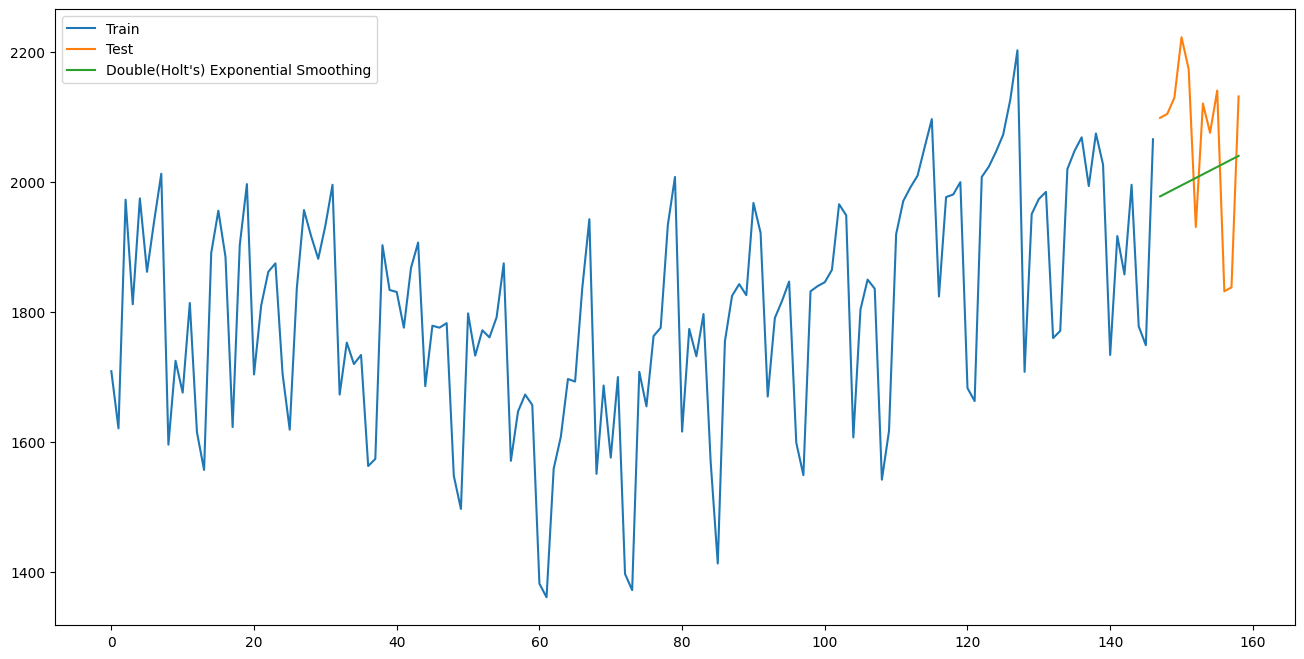

In [132]:
plt.figure(figsize=(16,8))
plt.plot(Train['Footfalls'],label = 'Train')
plt.plot(Test['Footfalls'],label = 'Test')
plt.plot(pred_hw['hold_method'],label = "Double(Holt's) Exponential Smoothing")
plt.legend(loc='best')
plt.show()

In [134]:
# triple exponential

In [143]:
ehw_model = ExponentialSmoothing(Train['Footfalls'],seasonal='add',trend = 'add',seasonal_periods=12).fit()
pred_ehw = pd.DataFrame()
pred_ehw['holdWinter_method'] = ehw_model.predict(start=Test.index[0],end = Test.index[-1])
MAPE(pred_ehw['holdWinter_method'],Test.Footfalls)

2.0083954068872694

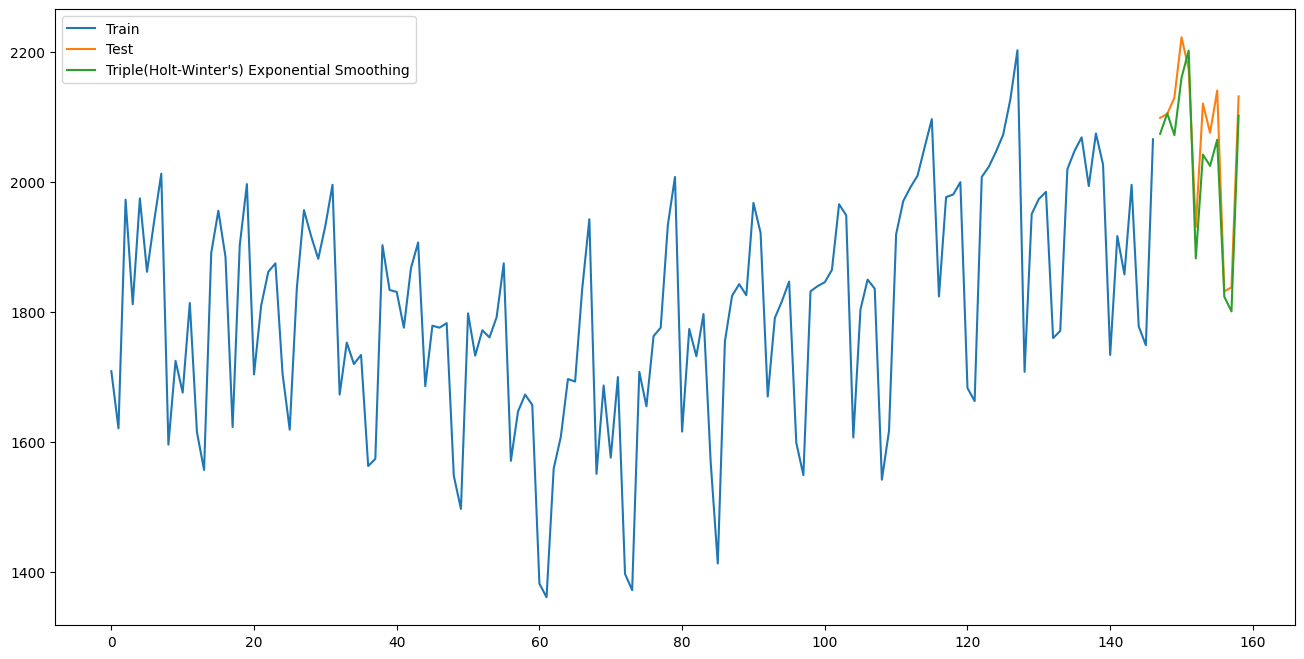

In [144]:
plt.figure(figsize=(16,8))
plt.plot(Train['Footfalls'],label = 'Train')
plt.plot(Test['Footfalls'],label = 'Test')
plt.plot(pred_ehw['holdWinter_method'],label = "Triple(Holt-Winter's) Exponential Smoothing")
plt.legend(loc='best')
plt.show()

In [145]:
ehw_model1 = ExponentialSmoothing(Train['Footfalls'],seasonal='add',trend = 'add',seasonal_periods=12).fit(smoothing_level=0.7, smoothing_slope=0.1, smoothing_seasonal=0.2)
pred_ehw1 = pd.DataFrame()
pred_ehw1['holdWinter_method'] = ehw_model1.predict(start=Test.index[0],end = Test.index[-1])
MAPE(pred_ehw1['holdWinter_method'],Test.Footfalls)

/tmp/ipykernel_23502/4247840982.py:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  ehw_model1 = ExponentialSmoothing(Train['Footfalls'],seasonal='add',trend = 'add',seasonal_periods=12).fit(smoothing_level=0.7, smoothing_slope=0.1, smoothing_seasonal=0.2)


1.0354727067795404

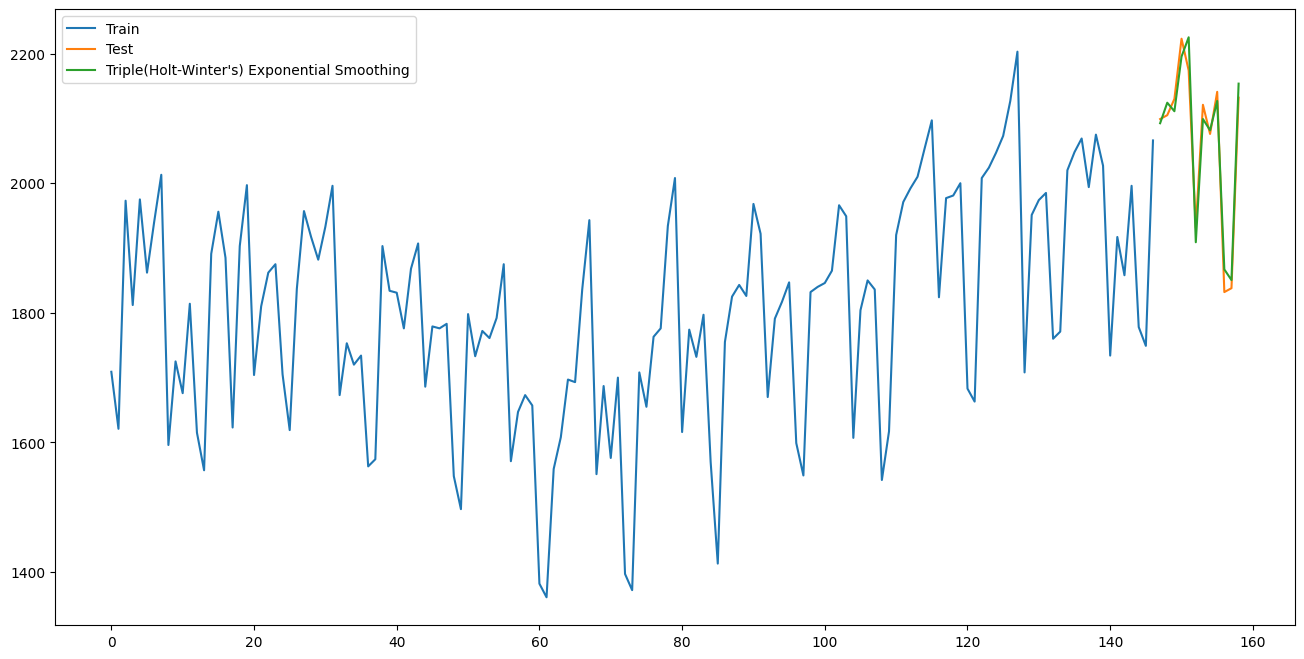

In [146]:
plt.figure(figsize=(16,8))
plt.plot(Train['Footfalls'],label = 'Train')
plt.plot(Test['Footfalls'],label = 'Test')
plt.plot(pred_ehw1['holdWinter_method'],label = "Triple(Holt-Winter's) Exponential Smoothing")
plt.legend(loc='best')
plt.show()

In [147]:
ehw_model2 = ExponentialSmoothing(Train['Footfalls'],seasonal='add',seasonal_periods=12).fit()
pred_ehw2 = pd.DataFrame()
pred_ehw2['holdWinter_method'] = ehw_model2.predict(start=Test.index[0],end = Test.index[-1])
MAPE(pred_ehw2['holdWinter_method'],Test.Footfalls)

3.460519277534299

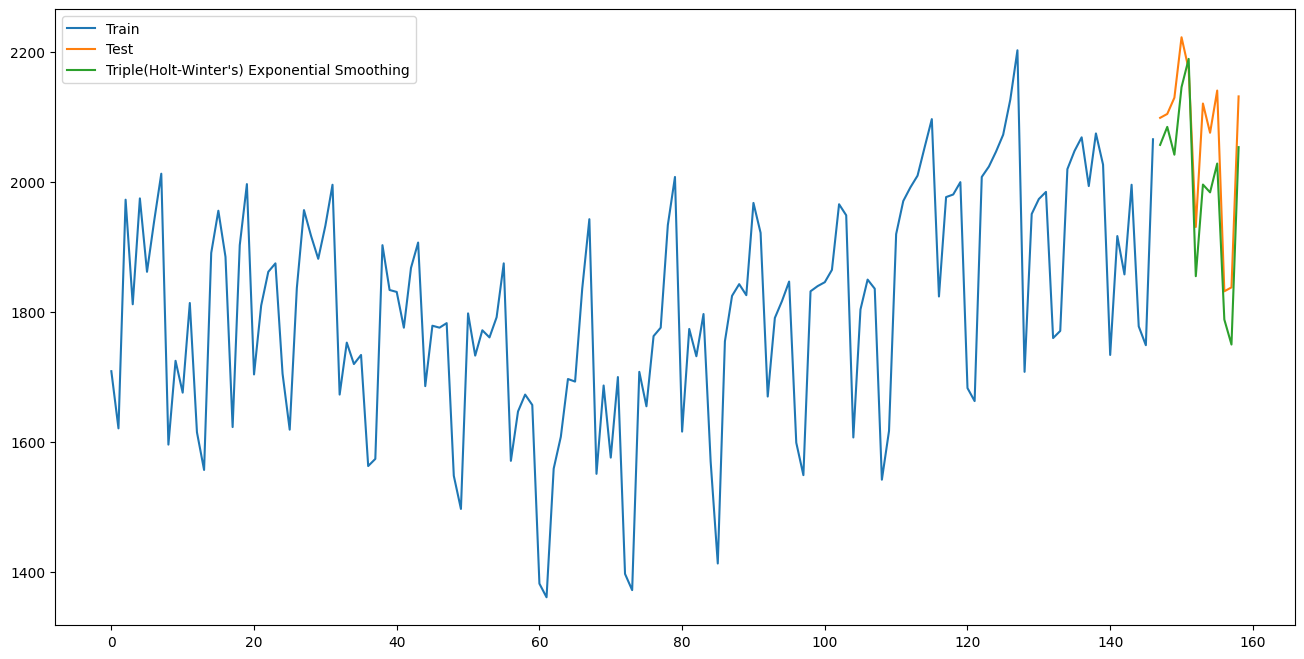

In [148]:
plt.figure(figsize=(16,8))
plt.plot(Train['Footfalls'],label = 'Train')
plt.plot(Test['Footfalls'],label = 'Test')
plt.plot(pred_ehw2['holdWinter_method'],label = "Triple(Holt-Winter's) Exponential Smoothing")
plt.legend(loc='best')
plt.show()

In [149]:
# predict for the future

In [152]:
future_data = ehw_model1.forecast(10)
future_data = pd.DataFrame(future_data,columns = [['forecast']])
future_data

,forecast
147,2092.554905
148,2124.229829
149,2111.067176
150,2195.453950
151,2225.207914
152,1908.882919
153,2099.031020
154,2081.693814
155,2126.895792
156,1866.995647


In [160]:
ehw_model1 = ExponentialSmoothing(df['Footfalls'],seasonal='add',trend = 'add',seasonal_periods=12).fit(smoothing_level=0.7, smoothing_slope=0.1, smoothing_seasonal=0.2)
pred_ehw1 = pd.DataFrame()
pred_ehw1['holdWinter_method'] = ehw_model1.predict(start=Test.index[0],end = Test.index[-1])
MAPE(pred_ehw1['holdWinter_method'],Test.Footfalls)

/tmp/ipykernel_23502/890392384.py:1: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  ehw_model1 = ExponentialSmoothing(df['Footfalls'],seasonal='add',trend = 'add',seasonal_periods=12).fit(smoothing_level=0.7, smoothing_slope=0.1, smoothing_seasonal=0.2)


1.3275891072705932

In [161]:
future_data = ehw_model1.forecast(10)
future_data = pd.DataFrame(future_data,columns = [['forecast']])
future_data

,forecast
159,2161.276162
160,2184.847106
161,2181.042773
162,2260.555964
163,2269.809967
164,1977.501211
165,2158.030129
166,2130.589122
167,2180.993511
168,1907.059045


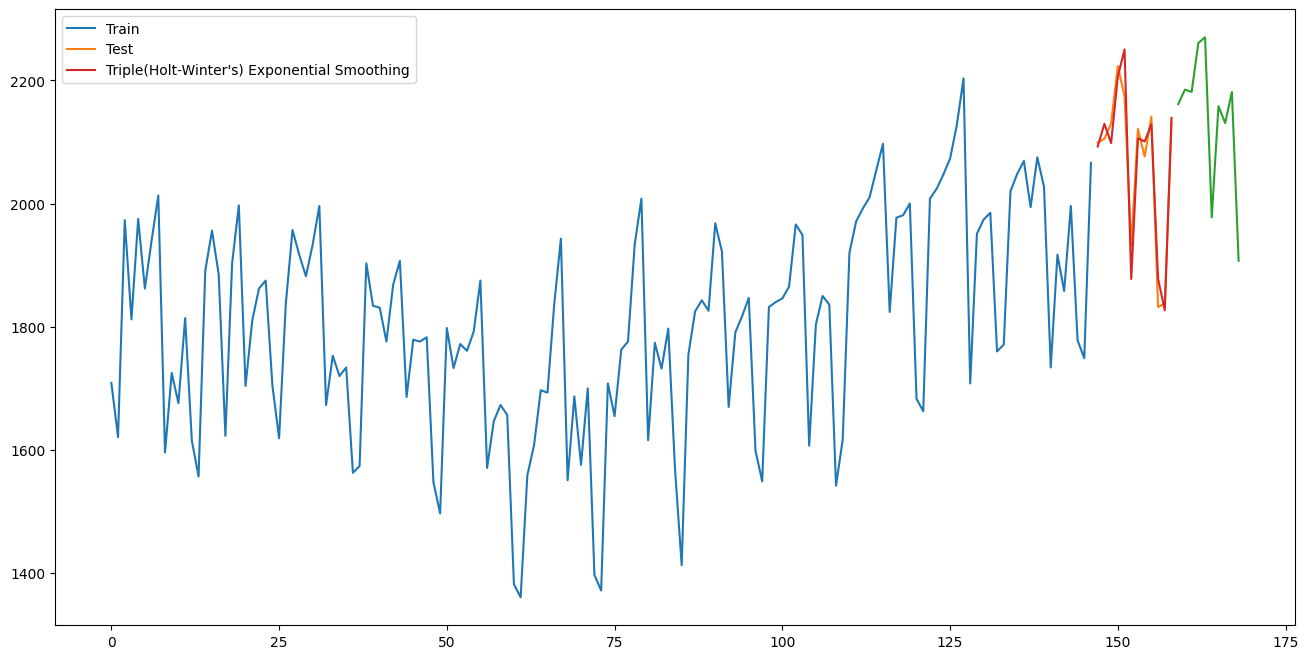

In [163]:
plt.figure(figsize=(16,8))
plt.plot(Train['Footfalls'],label = 'Train')
plt.plot(Test['Footfalls'],label = 'Test')
plt.plot(future_data)
plt.plot(pred_ehw1['holdWinter_method'],label = "Triple(Holt-Winter's) Exponential Smoothing")
plt.legend(loc='best')
plt.show()